# Welcome to the ProgPy ProgModels example notebook for Sim!

One of the most basic of functions using a model is simulation. Simulation is the process of predicting the evolution of system state with time, given a specific future load profile. Unlike full prognostics, simulation does not include uncertainty in the state and other product (e.g., output) representation. For a prognostics model, simulation is done using the prog_models.PrognosticsModel.simulate_to() and prog_models.PrognosticsModel.simulate_to_threshold() methods.

‎ 

In this Notebook, we will explore the process of creating a model, simulating it, and analyzing the results. We will use an example of a battery being simulated for a set period of time and then till threshold is met.

But first, let us define the two main functions that will be used for simulating results!

#### [__simulate_to__](https://nasa.github.io/progpy/api_ref/prog_models/PrognosticModel.html#prog_models.PrognosticsModel.simulate_to) : Simulate prognostics model for a given number of seconds



#### [__simulate_to_threshold__](https://nasa.github.io/progpy/api_ref/prog_models/PrognosticModel.html#prog_models.PrognosticsModel.simulate_to_threshold) : Simulate prognostics model until any or specified threshold(s) have been met

With these two functions defined, let's get started with the example!

### Step 1. Importing the necessary libraries and creating model object!

In [1]:
import matplotlib.pyplot as plt
from prog_models.models import BatteryElectroChem
from prog_models.models import BatteryCircuit as Battery
from prog_models.loading import Piecewise

In [2]:
batt = Battery()

### Step 2: Define future loading function - here we're using a piecewise scheme

In [3]:
future_loading = Piecewise(
    batt.InputContainer,
    [600, 900, 1800, 3600, float('inf')],
    {'i': [2, 1, 4, 2, 3]})

### Step 3: Simulating to a specific time

In [4]:
print('\n\n------------------------------------------------')
print('Simulating for 200 seconds\n\n')
simulated_results = batt.simulate_to(200, future_loading, print = True, progress = True)



------------------------------------------------
Simulating for 200 seconds


Time: 0.0
	Input: {'i': 2.0}
	State: {'tb': 292.1, 'qb': 7856.3254, 'qcp': 0.0, 'qcs': 0.0}
	Output: {'t': 292.1, 'v': 4.182999999010731}
	Event State: {'EOD': 1.0}

Progress |----------------------------------------------------------------------------------------------------| 0.0% 
Progress |██--------------------------------------------------------------------------------------------------| 2.0% 
Progress |████------------------------------------------------------------------------------------------------| 4.0% 
 Time: 10.0
	Input: {'i': 2.0}
	State: {'tb': 292.1593923288088, 'qb': 7836.321374670183, 'qcp': 2.06894116298379, 'qcs': 14.192228589474794}
	Output: {'t': 292.1593923288088, 'v': 3.9801969126891716}
	Event State: {'EOD': 0.997427796665833}

Progress |██████----------------------------------------------------------------------------------------------| 6.0% 
Progress |████████---------------------

The result of the simulation is now stored in simulated_results. You can access the results by accessing the individual variables: times, inputs, states, outputs, event_states. E.g., states = simulated_results.states.

You can also plot the results, for example

/Users/aditummala/Desktop/prog_models/src/prog_models/exceptions.py:20: UserWarning: Behavior of SimResult.plot() will change with version 1.6. New behavior will match that of a pandas data frame.
  warn(msg, *args, **kwargs)


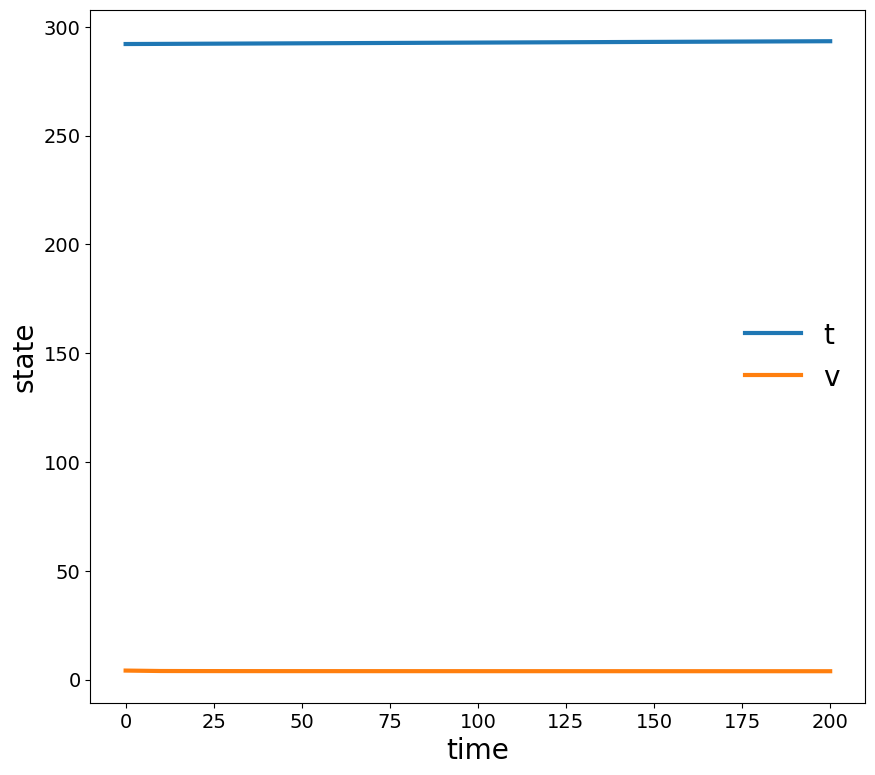

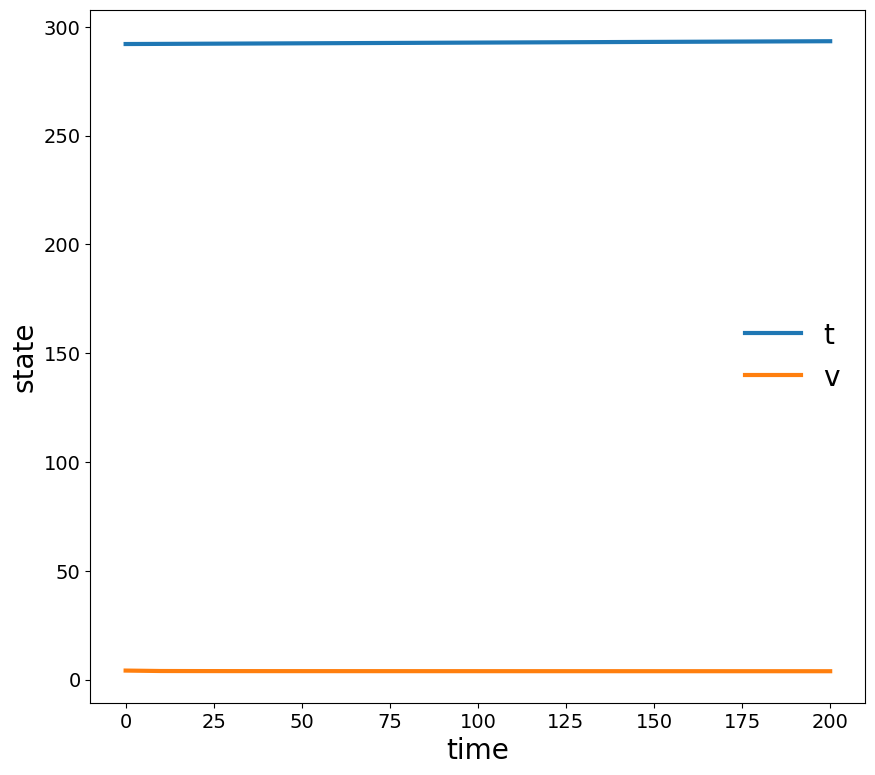

In [5]:
simulated_results.outputs.plot()

or, with configuration...

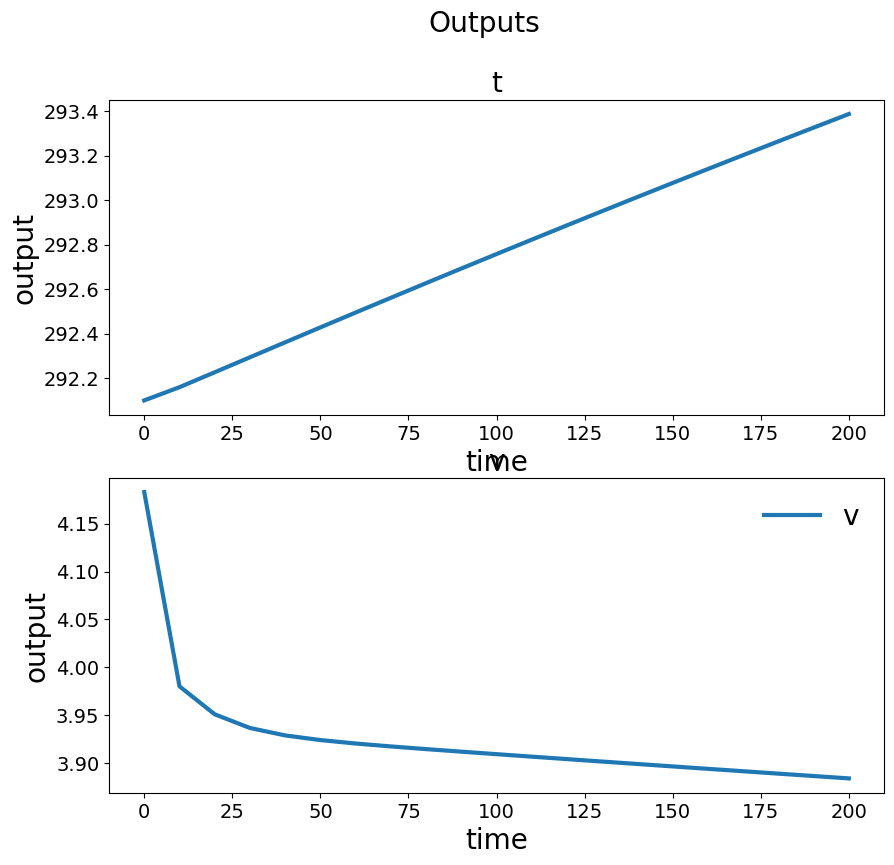

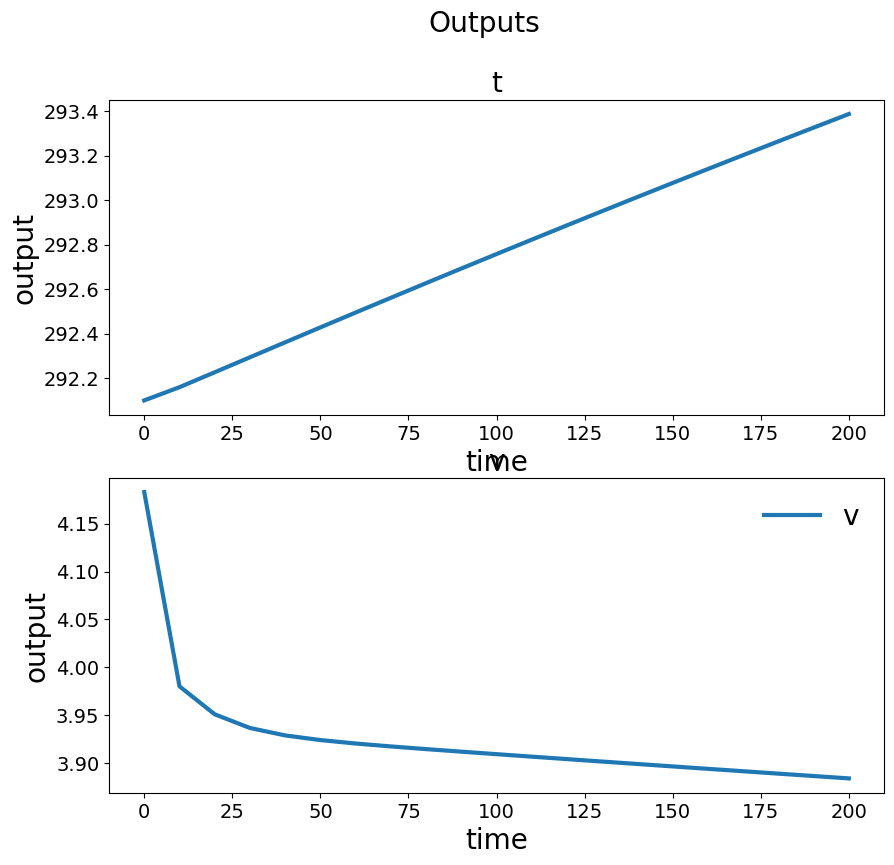

In [6]:
simulated_results.outputs.plot(compact = False, suptitle = 'Outputs', title = 'example title', xlabel = 'time', ylabel = 'output')

### Using `simulate_to_threshold()`